# 타이 타닉 생존자 예측

### Author : Forrest DongGeun Park 
### G-date : 2024.02.23
### Description : 통계 기법 활용


In [26]:
## Basic Settings
    options(warn = -1) ## 경고 지우기
    options(repr.plot.width=8, repr.plot.height=6) # 플랏 크기 조절
    Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8") # 한글 설정
# Basic Graph Google Font Setting
    library(showtext) ## plot : 구글 폰트 사용 
    font_add_google(name = "Noto Serif KR",family = "noto-serif")
    showtext_auto(TRUE)

## Data Fetch (basic)
    ## CSV file
    # read.csv('',
    #         na.strings=NA, header = T, sep=",",encoding = "UTF-8") 

    ## Text File
    # readtable("", 
    #          encoding ="EUC-KR", fileEncoding ="UTF-8", 
    #          colnames =varnames,
    #          hearder =F, skip =0, nrows =-1, sep="")

# Libraries for data fetching
    library(jsonlite) # JSON file fetch
    # fromJSON("") #: json file fetch
    library(XML) # XML file fetch
    # xmlToDataFrame("")
    library(readxl) # excel file fetch
    # read_excel("", sheet =2)

## 함수 정리 

## 기본함수 : data, str, length, ncol, nrow, dim, ls, head, tail, library, 
    # data<- c(1,2,3)
    # label = c('a','b','c')
    # names(data)<-label
    
    # matrix( data, nrow= 2, ncol=3 , byrow=T)
    # array(data, dim = c(2,3))
    # list(data, "hello")
    # factor(data, labels= label)

## 기본 통계량 mean, median, min, max, range, sd, hist, barplot, stem, var
    # range(data) #: data 의 최대 최소 출력
    # var(data)  #: data 의 분산값 출력
    # quantile(data, probs = 0.25) # :  사분위 수 출력 함수 

## 데이터 처리 : apply, sapply, lapply 

## 데이터 시각화
    # stem(col, scale =1)
    # hist(data) # : data 의 histogram(연속 분포함수 ) 
    # barplot(data, ylim =c(0:10), main= "title", xlab="x label", ylab="y label", names =colnames(data)), 


## Libraries for DATA
    library(stringr) # stringr 불러오기
    library(dplyr) # dplyr : 데이터 가공 함수 -> 
    # filter(data,  a>1) : 특정 row 추출
    # select(data, a, b) : 특정 column 추출
    # arrange(data, desc(a))
    # mutate(data, a_rank =rank(a)) # a칼럼 값을 기준으로 rank 를 매겨 새로운 랭크 칼럼을 생성
    # distinct(data, a,b) # data 의 a, b 칼럼을 기준으로 중복된 행을 제거 (a와 b 가 동시에 중복)
    # summarise(data, a_mean = mean(a), a_min= min(a), a_sd = sd(a) .. func(a)) # a 칼럼의 평균, 등등의 함수 값 요약. 

    library(descr) # descr : 데이터 설명 함수 
    # freq(data, plot =F, main ="title") # : data row 별 빈도수 
    library(psych) # psych : 데이터 시각화 함수 pairs.panel(iris)
    # kurtosi(data) #: data 의 첨도값 출력 / psych 
    # skew(data) #: data 의 왜도값 출력 /psysy


library(reshape2) # data layout 변환 
library(ggplot2) # 그래프 
library(plotrix) # 3D pie
library(RColorBrewer) # color package
library(tidyverse)
library(hrbrthemes)
library(kableExtra)

library(caret) # data sampling 
library(randomForest) # prediction model 
library(nnet)


#library(extrafont)

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

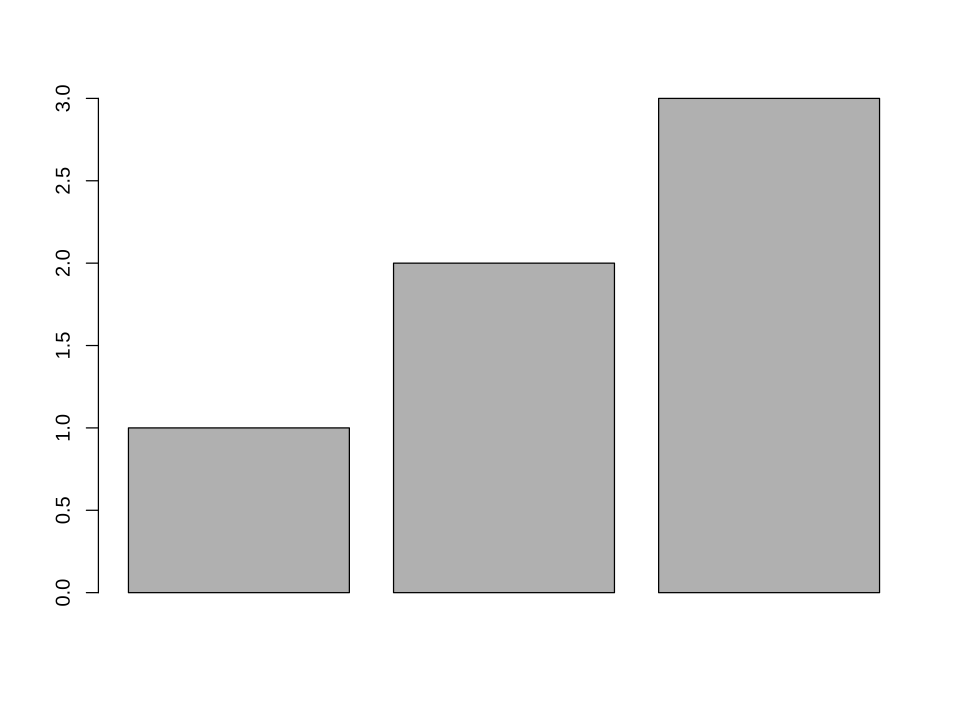

mutate                  package:plyr                   R Documentation

_M_u_t_a_t_e _a _d_a_t_a _f_r_a_m_e _b_y _a_d_d_i_n_g _n_e_w _o_r _r_e_p_l_a_c_i_n_g _e_x_i_s_t_i_n_g _c_o_l_u_m_n_s.

_D_e_s_c_r_i_p_t_i_o_n:

     This function is very similar to ‘transform’ but it executes the
     transformations iteratively so that later transformations can use
     the columns created by earlier transformations.  Like transform,
     unnamed components are silently dropped.

_U_s_a_g_e:

     mutate(.data, ...)
     
_A_r_g_u_m_e_n_t_s:

   .data: the data frame to transform

     ...: named parameters giving definitions of new columns.

_D_e_t_a_i_l_s:

     Mutate seems to be considerably faster than transform for large
     data frames.

_S_e_e _A_l_s_o:

     ‘subset’, ‘summarise’, ‘arrange’.  For another somewhat
     different approach to solving the same problem, see ‘within’.

_E_x_a_m_p_

In [35]:
    data<- c(1,2,3)
    label = c('a','b','c')
  
    barplot(data)
    help(mutate)

In [1]:
train_df <- read.csv("../Data/Titanic_train.csv")
head(train_df)


,X...PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


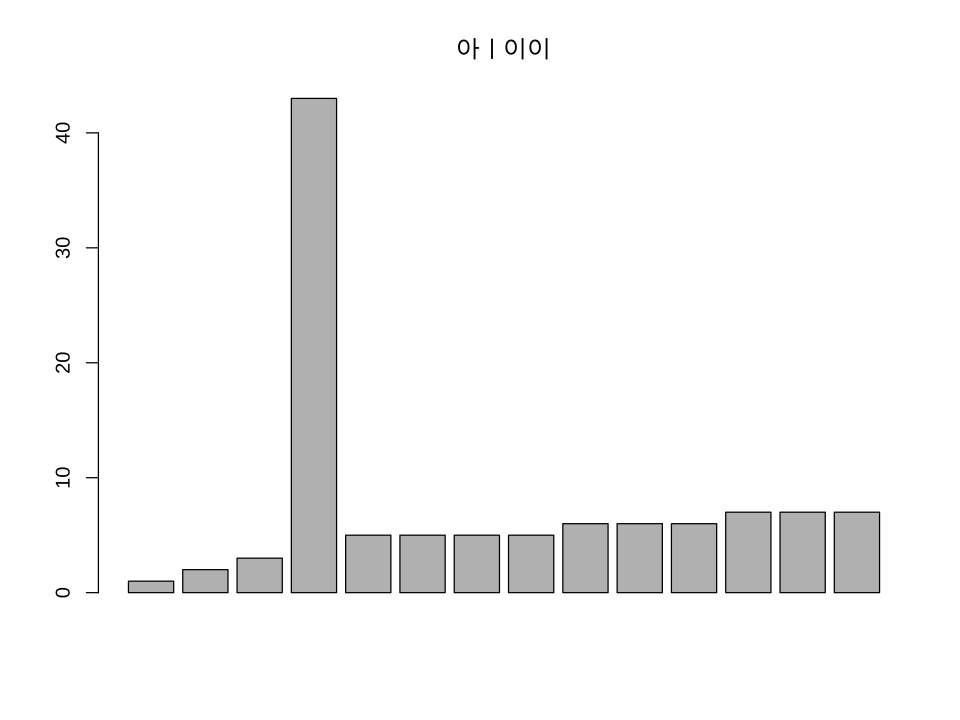

In [27]:
#library(extrafont)
#font_import("/System/Library/Fonts/NanumGothic.ttf")


car <- c(1,2,3,43,5,5,5,5,6,6,6,7,7,7)
par( bg ='white')
barplot(car, main ="아ㅣ이이", )


In [16]:
#install.packages("showtext")
#library(showtext)

